In [1]:
# %pip install mysql-connector-python

In [1]:
import mysql.connector
from mysql.connector import connect, Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 8)
sns.set_style('darkgrid')

In [2]:
employees = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd=input("please, enter you password: "),
    database="employees"
)

cursor = employees.cursor()

In [4]:
df = pd.read_sql_query(
    '''
    SELECT e.birth_date, e.first_name, e.last_name, e.gender,
    t.title, t.from_date,
    s.salary
    FROM employees e
    INNER JOIN 
    titles t 
    ON e.emp_no = t.emp_no
    INNER JOIN
    salaries s
    ON t.emp_no = s.emp_no
    ORDER BY e.emp_no;
    ''', 
    employees, parse_dates=["from_date", "birth_date"]
    )


In [5]:
print(df.head(10))

  birth_date first_name last_name gender            title  from_date  salary
0 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   60117
1 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   62102
2 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   66074
3 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   66596
4 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   66961
5 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   71046
6 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   74333
7 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   75286
8 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   75994
9 1953-09-02     Georgi   Facello      M  Senior Engineer 1986-06-26   76884


In [6]:
column_names = ['title', 'first_name', 'last_name', 'birth_date', 'gender', 'salary', 'from_date']
df = df.reindex(columns=column_names)

In [7]:
print(df.head(10))

             title first_name last_name birth_date gender  salary  from_date
0  Senior Engineer     Georgi   Facello 1953-09-02      M   60117 1986-06-26
1  Senior Engineer     Georgi   Facello 1953-09-02      M   62102 1986-06-26
2  Senior Engineer     Georgi   Facello 1953-09-02      M   66074 1986-06-26
3  Senior Engineer     Georgi   Facello 1953-09-02      M   66596 1986-06-26
4  Senior Engineer     Georgi   Facello 1953-09-02      M   66961 1986-06-26
5  Senior Engineer     Georgi   Facello 1953-09-02      M   71046 1986-06-26
6  Senior Engineer     Georgi   Facello 1953-09-02      M   74333 1986-06-26
7  Senior Engineer     Georgi   Facello 1953-09-02      M   75286 1986-06-26
8  Senior Engineer     Georgi   Facello 1953-09-02      M   75994 1986-06-26
9  Senior Engineer     Georgi   Facello 1953-09-02      M   76884 1986-06-26


In [8]:
df.shape

(4638507, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638507 entries, 0 to 4638506
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   title       object        
 1   first_name  object        
 2   last_name   object        
 3   birth_date  datetime64[ns]
 4   gender      object        
 5   salary      int64         
 6   from_date   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 247.7+ MB


In [10]:
df.isna().sum()

title         0
first_name    0
last_name     0
birth_date    0
gender        0
salary        0
from_date     0
dtype: int64

In [11]:
df.columns

Index(['title', 'first_name', 'last_name', 'birth_date', 'gender', 'salary',
       'from_date'],
      dtype='object')

In [12]:
df.describe()

,salary
count,4.638507e+06
mean,6.445426e+04
std,1.698653e+04
min,3.862300e+04
25%,5.119200e+04
50%,6.184400e+04
75%,7.489700e+04
max,1.582200e+05


<AxesSubplot:ylabel='Frequency'>

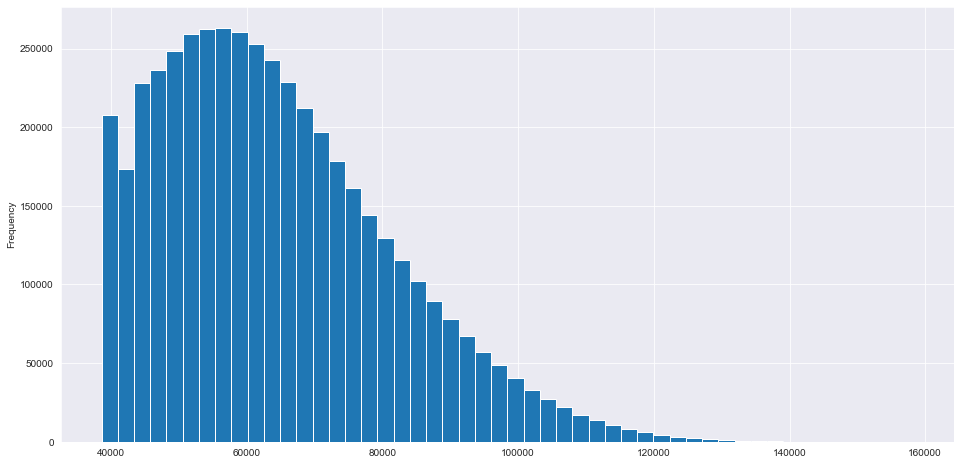

In [13]:
df.salary.plot(kind='hist', bins=50)

<AxesSubplot:xlabel='salary'>

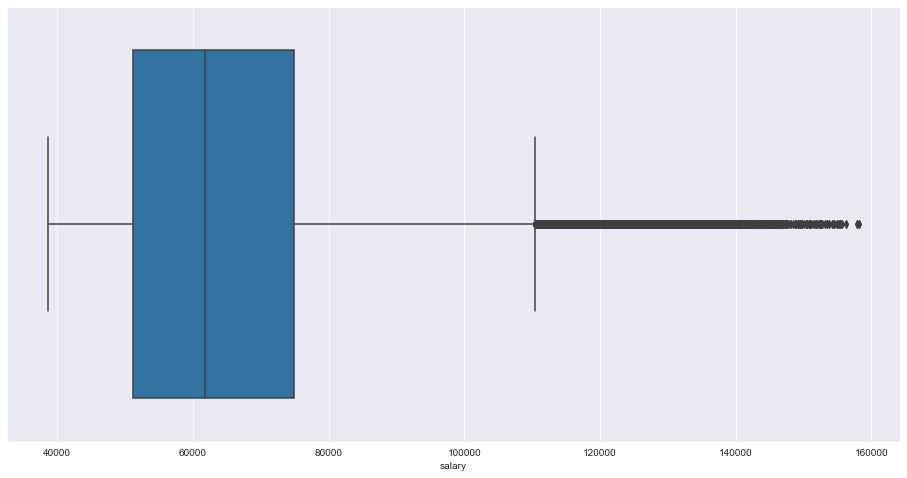

In [14]:
sns.boxplot(x='salary', data=df)

<AxesSubplot:xlabel='salary', ylabel='Density'>

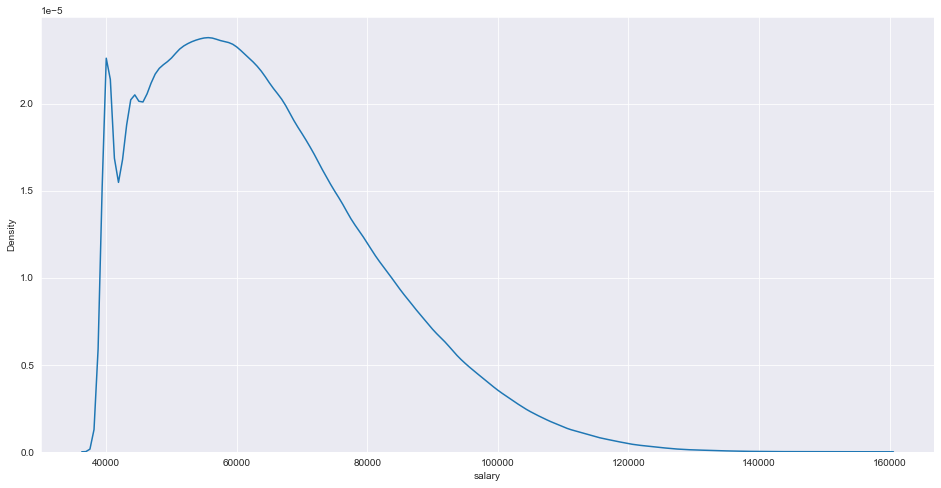

In [15]:
sns.kdeplot(df.salary)

In [16]:
df.title.value_counts()

Senior Engineer       1137450
Engineer              1115673
Senior Staff          1078920
Staff                 1019729
Technique Leader       143311
Assistant Engineer     143036
Manager                   388
Name: title, dtype: int64

<AxesSubplot:>

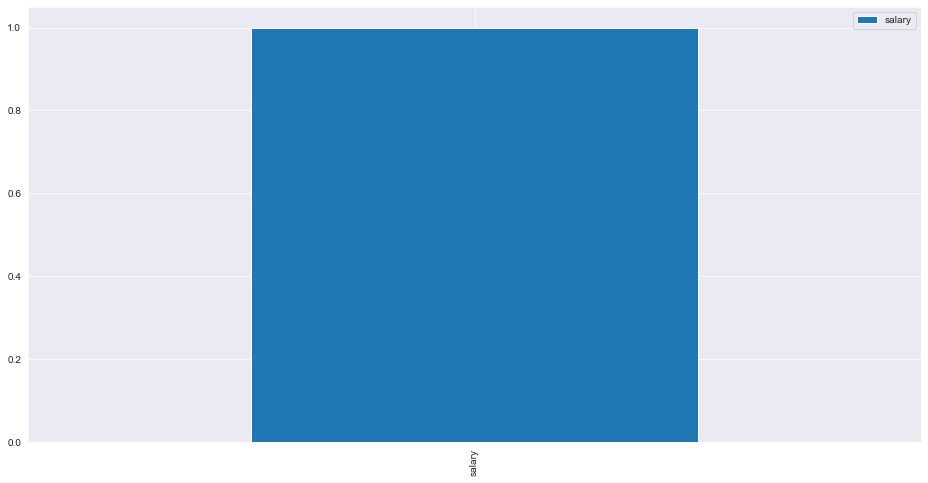

In [17]:
df.corr().plot(kind='bar')

<AxesSubplot:xlabel='title'>

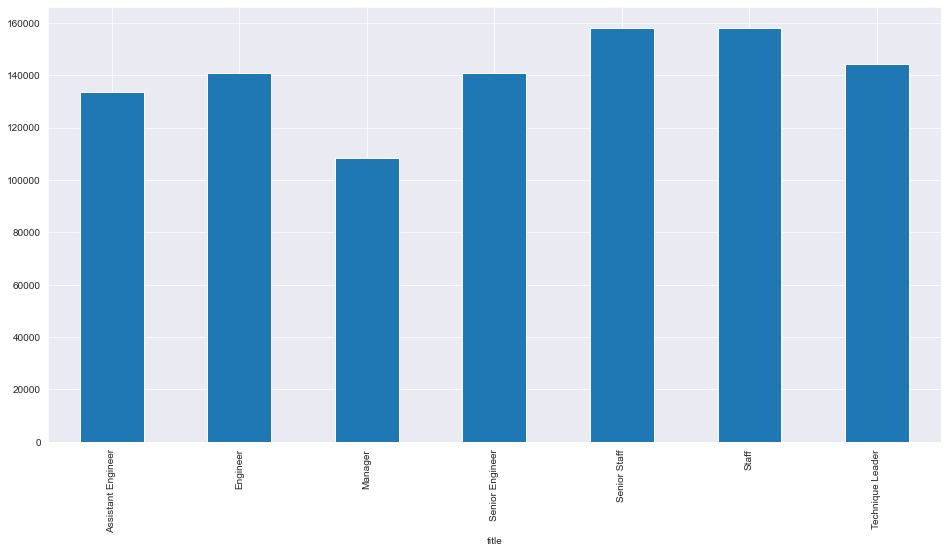

In [18]:
# what title has the highest salary?
df.groupby('title').salary.max().plot(kind='bar')

<AxesSubplot:xlabel='title', ylabel='salary'>

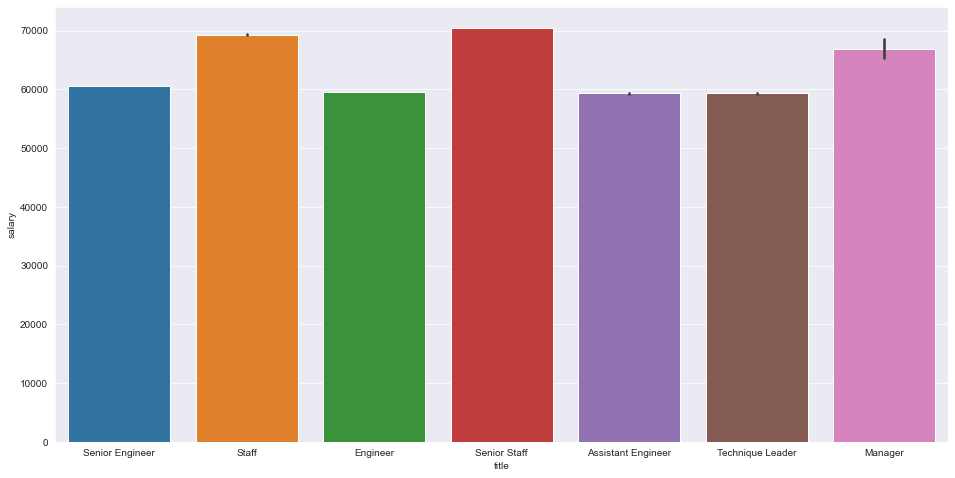

In [19]:
sns.barplot(x='title', y='salary', data=df)

<AxesSubplot:xlabel='title', ylabel='salary'>

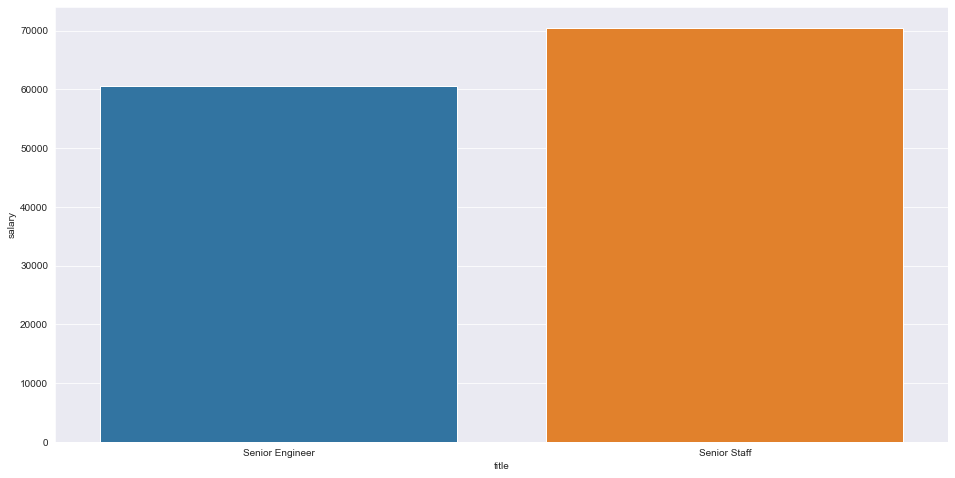

In [20]:
# how many senior engineers or staff are there?
sns.barplot(x='title', y='salary', data=df[df.title.str.contains('Senior')])

In [21]:
df.head()

,title,first_name,last_name,birth_date,gender,salary,from_date
0,Senior Engineer,Georgi,Facello,1953-09-02,M,60117,1986-06-26
1,Senior Engineer,Georgi,Facello,1953-09-02,M,62102,1986-06-26
2,Senior Engineer,Georgi,Facello,1953-09-02,M,66074,1986-06-26
3,Senior Engineer,Georgi,Facello,1953-09-02,M,66596,1986-06-26
4,Senior Engineer,Georgi,Facello,1953-09-02,M,66961,1986-06-26


In [22]:
df.from_date.unique()

array(['1986-06-26T00:00:00.000000000', '1996-08-03T00:00:00.000000000',
       '1995-12-03T00:00:00.000000000', ...,
       '1985-02-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1985-01-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
df.salary.min()

38623

In [24]:
# get the ten employees with the lowest salary
print(df[df.salary == df.salary.min()].head(10))


                    title first_name last_name birth_date gender  salary  \
2377404  Technique Leader    Olivera      Baek 1953-09-23      M   38623   

         from_date  
2377404 1999-02-21  


In [25]:
df.groupby('first_name').first_name.count()

first_name
Aamer         3370
Aamod         3200
Abdelaziz     3337
Abdelghani    4094
Abdelkader    3214
              ... 
Ziyad         3350
Zongyan       4009
Zorica        3448
Zsolt         3708
Zvonko        3831
Name: first_name, Length: 1275, dtype: int64

In [26]:
df[df.title == 'Senior Engineer'].groupby('title').title.count()

title
Senior Engineer    1137450
Name: title, dtype: int64

<AxesSubplot:xlabel='title', ylabel='salary'>

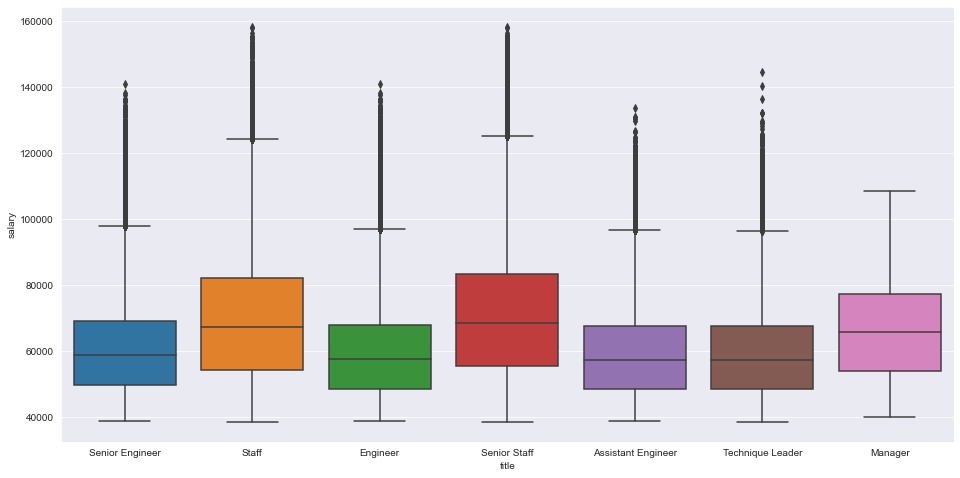

In [27]:
sns.boxplot(x='title', y='salary', data=df)

In [28]:
print(df.head())

             title first_name last_name birth_date gender  salary  from_date
0  Senior Engineer     Georgi   Facello 1953-09-02      M   60117 1986-06-26
1  Senior Engineer     Georgi   Facello 1953-09-02      M   62102 1986-06-26
2  Senior Engineer     Georgi   Facello 1953-09-02      M   66074 1986-06-26
3  Senior Engineer     Georgi   Facello 1953-09-02      M   66596 1986-06-26
4  Senior Engineer     Georgi   Facello 1953-09-02      M   66961 1986-06-26


In [29]:
# how many engineers are there?
df[df.title == 'Engineer'].groupby('title').title.count()

title
Engineer    1115673
Name: title, dtype: int64

In [30]:
# what is the average salary of a senior engineer?
df[df.title == 'Senior Engineer'].groupby('title').salary.mean()

title
Senior Engineer    60543.21913
Name: salary, dtype: float64

In [31]:
# what is the average salary of an engineer?
df[df.title == 'Engineer'].groupby('title').salary.mean()

title
Engineer    59508.039715
Name: salary, dtype: float64

In [32]:
# who is the person with the highest salary?
df[df.salary == df.salary.max()].head(1)

,title,first_name,last_name,birth_date,gender,salary,from_date
519272,Senior Staff,Tokuyasu,Pesch,1953-11-14,M,158220,1992-03-26


In [33]:
# who is the person with the lowest salary?
df[df.salary == df.salary.min()].head(1)

,title,first_name,last_name,birth_date,gender,salary,from_date
2377404,Technique Leader,Olivera,Baek,1953-09-23,M,38623,1999-02-21


In [34]:
# what is the average salary of men?
df[df.gender == 'M'].groupby('gender').salary.mean()

gender
M    64490.028124
Name: salary, dtype: float64

In [35]:
# what is the average salary of women?
df[df.gender == 'F'].groupby('gender').salary.mean()

gender
F    64400.534977
Name: salary, dtype: float64

In [36]:
# how many males are senior engineers?
male_senior_engineers = df[(df.gender == 'm'.upper()) & (df.title == 'Senior Engineer')].value_counts()
male_senior_engineers

title            first_name  last_name    birth_date  gender  salary  from_date 
Senior Engineer  Otmar       Kowalchuk    1960-08-31  M       42807   2002-04-10    2
                 Zijian      Shokrollahi  1955-07-19  M       68064   1998-04-06    2
                 Shir        Kandlur      1957-01-24  M       60864   2000-10-02    2
                 Stepehn     Saoudi       1954-06-18  M       73787   1987-12-04    2
                 Val         Bade         1952-04-12  M       48372   2002-01-06    2
                                                                                   ..
                 Hongzue     Melton       1964-07-31  M       91713   1992-01-20    1
                                                              92050   1992-01-20    1
                                                              93726   1992-01-20    1
                                                              94109   1992-01-20    1
                 Zvonko      Wielonsky    1956-12-01  M    

In [37]:
# how many females are senior engineers?
female_senior_engineers = df[(df.gender == 'f'.upper()) & (df.title == 'Senior Engineer')].value_counts()
female_senior_engineers

title            first_name  last_name    birth_date  gender  salary  from_date 
Senior Engineer  Masadi      Roohalamini  1953-09-29  F       46028   1992-06-01    2
                 Kousuke     Skafidas     1964-08-21  F       44035   1997-11-12    2
                 Tzu         Solares      1956-05-16  F       72479   1999-06-06    2
                 Sreenivas   Aloisi       1958-09-10  F       56659   1997-02-21    2
                 Kazuhisa    Ressouche    1958-06-17  F       55403   1994-02-06    2
                                                                                   ..
                 Hongzhu     Pollock      1954-10-24  F       62441   2001-04-08    1
                                                              59861   2001-04-08    1
                                                              59419   2001-04-08    1
                                                              57721   2001-04-08    1
                 Zvonko      Zuberek      1960-01-07  F    

In [38]:
# find how many people with the name Markovitch there are
df[(df.last_name == 'Markovitch') & (df.title == 'Engineer') & (df.gender == 'm'.upper())].value_counts()

title     first_name  last_name   birth_date  gender  salary  from_date 
Engineer  Adib        Markovitch  1954-10-07  M       69702   2001-07-07    1
          Martine     Markovitch  1952-08-06  M       64434   1988-04-20    1
          Muzhong     Markovitch  1958-12-23  M       49347   1999-08-19    1
                                                      47973   1999-08-19    1
                                                      43944   1999-08-19    1
                                                                           ..
          Goa         Markovitch  1952-09-30  M       73983   1992-09-06    1
          Genevieve   Markovitch  1954-09-03  M       51011   1997-08-11    1
                                                      50590   1997-08-11    1
                                                      48080   1997-08-11    1
          Zongyan     Markovitch  1954-09-28  M       58588   1998-03-07    1
Length: 437, dtype: int64

In [39]:
df.salary.max()

158220

In [40]:
df[df.salary > 120000].value_counts()

title               first_name  last_name    birth_date  gender  salary  from_date 
Senior Staff        Toshimo     Reghbati     1953-01-26  M       132847  1995-12-11    2
Staff               Toshimo     Reghbati     1953-01-26  M       132847  1986-12-11    2
Assistant Engineer  Jessie      Thiran       1961-11-23  M       120910  1987-10-09    1
Staff               Fumino      Ciolek       1962-08-12  M       120173  1989-07-18    1
                    Frazer      Ranze        1957-03-07  M       120951  1985-03-04    1
                                                                                      ..
Senior Staff        Mona        Luck         1965-01-29  M       125743  1989-05-11    1
                                Mitzlaff     1957-02-06  F       120367  1988-12-31    1
                                                                 122110  1988-12-31    1
                                                                 122425  1988-12-31    1
Technique Leader    Valdio

In [41]:
df[(df.gender == 'f'.upper()) & (df.salary > 120000)]

,title,first_name,last_name,birth_date,gender,salary,from_date
3630,Senior Staff,Yannis,Mandell,1952-09-22,F,122275,1997-08-11
3631,Senior Staff,Yannis,Mandell,1952-09-22,F,125947,1997-08-11
3641,Staff,Yannis,Mandell,1952-09-22,F,122275,1989-08-11
3642,Staff,Yannis,Mandell,1952-09-22,F,125947,1989-08-11
8155,Senior Staff,Mary,Wossner,1959-08-31,F,122653,1993-05-18
...,...,...,...,...,...,...,...
4627810,Senior Staff,Weiwu,Pardalos,1962-09-23,F,125006,1993-04-25
4627827,Staff,Weiwu,Pardalos,1962-09-23,F,122455,1985-04-25
4627828,Staff,Weiwu,Pardalos,1962-09-23,F,125006,1985-04-25
4638331,Senior Staff,Nathan,Ranta,1952-07-22,F,120013,1992-08-11
